In [2]:
pip install pyspark==3.2

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 35.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=3361c212dfca7f333b4b1500d51b585af827aa3e9b269c65ba68f45ed32cd9f1
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [3]:
import pyspark as ps

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
file="/content/gdrive/MyDrive/TweetSentimentAnalysisCategoryAndVisualization/PredictedDataset/part-00000-1a6b304d-5422-4b8a-be02-064539e99158-c000.csv"
file1="/content/gdrive/MyDrive/TweetSentimentAnalysisCategoryAndVisualization/PredictedDataset/part-00001-1a6b304d-5422-4b8a-be02-064539e99158-c000.csv"
file2="/content/gdrive/MyDrive/TweetSentimentAnalysisCategoryAndVisualization/PredictedDataset/part-00002-1a6b304d-5422-4b8a-be02-064539e99158-c000.csv"
file3="/content/gdrive/MyDrive/TweetSentimentAnalysisCategoryAndVisualization/PredictedDataset/part-00003-1a6b304d-5422-4b8a-be02-064539e99158-c000.csv"
file4="/content/gdrive/MyDrive/TweetSentimentAnalysisCategoryAndVisualization/PredictedDataset/part-00004-1a6b304d-5422-4b8a-be02-064539e99158-c000.csv"
file5="/content/gdrive/MyDrive/TweetSentimentAnalysisCategoryAndVisualization/PredictedDataset/part-00005-1a6b304d-5422-4b8a-be02-064539e99158-c000.csv"

In [6]:
#sc.stop()
conf = ps.SparkConf().setAll([('spark.executor.memory', '16g'), ('spark.driver.memory', '16g')])
sc = ps.SparkContext(conf=conf)

In [7]:
import functools
  
def unionAll(dfs):
    return functools.reduce(lambda df1, df2: df1.union(df2.select(df1.columns)), dfs)

In [8]:
from pyspark.sql import SQLContext

sql_context = SQLContext(sc)
TwitterDataset = sql_context.read.format('com.databricks.spark.csv').option('header','false').option("delimiter", ",").load(file)
TwitterDataset1 = sql_context.read.format('com.databricks.spark.csv').option('header','false').option("delimiter", ",").load(file1)
TwitterDataset2 = sql_context.read.format('com.databricks.spark.csv').option('header','false').option("delimiter", ",").load(file2)
TwitterDataset3 = sql_context.read.format('com.databricks.spark.csv').option('header','false').option("delimiter", ",").load(file3)
TwitterDataset4 = sql_context.read.format('com.databricks.spark.csv').option('header','false').option("delimiter", ",").load(file4)
TwitterDataset5 = sql_context.read.format('com.databricks.spark.csv').option('header','false').option("delimiter", ",").load(file5)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [9]:

TwitterDataset = unionAll([TwitterDataset, TwitterDataset2])

In [10]:
TwitterDataset = unionAll([TwitterDataset, TwitterDataset1])

In [11]:
TwitterDataset = unionAll([TwitterDataset, TwitterDataset3])

In [12]:
TwitterDataset = unionAll([TwitterDataset, TwitterDataset4])

In [13]:
TwitterDataset = unionAll([TwitterDataset, TwitterDataset5])

In [14]:
print(TwitterDataset.count())

267483


In [15]:
TwitterDataset.show()

+--------------------+---+-------------+
|                 _c0|_c1|          _c2|
+--------------------+---+-------------+
|dogo strong proje...|4.0|         tech|
|true btw have you...|4.0|     business|
|sounds like some ...|4.0|entertainment|
|i said single sex...|4.0|    political|
|ain t a helluva l...|4.0|    political|
|trip fam work in ...|0.0|        sport|
|oh this month edi...|4.0|entertainment|
|police officer se...|0.0|    political|
|they won t return...|0.0|         tech|
|                done|4.0|        sport|
|ez fuckin pz easy...|4.0|        sport|
|   rt if you want it|0.0|    political|
|nya who says you ...|4.0|        sport|
|oh i wish this wa...|0.0|        sport|
|if you see an art...|4.0|         tech|
|it s all a bit me...|4.0|        sport|
|this is a great a...|4.0|entertainment|
|he doesn t have a...|0.0|        sport|
|only because lein...|0.0|        sport|
|magazine hi there...|0.0|entertainment|
+--------------------+---+-------------+
only showing top

In [16]:
query_1_source = TwitterDataset.groupBy("_c2").count()


In [17]:
query_1_source.show()

+-------------+-----+
|          _c2|count|
+-------------+-----+
|        sport|71929|
|    political|45775|
|entertainment|59340|
|     business|27841|
|         tech|62598|
+-------------+-----+



In [18]:
TwitterDataset.createOrReplaceTempView("tweets")

In [19]:
query_1_source = sql_context.sql("SELECT cast(count(*) as int) as count , _c2 as categories FROM tweets WHERE _c2 ='political' or _c2='tech' or _c2='business' GROUP BY _c2 ORDER BY count desc")

In [20]:
query_1_source = query_1_source.toPandas()


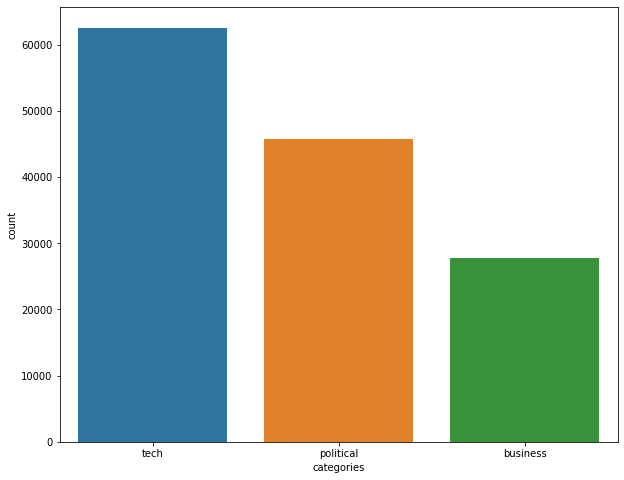

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
import seaborn as sns
import pandas
sns.barplot( x="categories", y="count", data=query_1_source)
plt.show()

In [22]:
from pyspark.sql.functions import col
#sentimentDataSet = TwitterDataset.select(col("_c1").alias("Sentiment"))
query_1_source = sql_context.sql("SELECT * FROM tweets WHERE _c2 ='political' or _c2='tech' or _c2='business' ")

In [23]:
from pyspark.sql.functions import when
sentimentDataSet=query_1_source.withColumn("_c1", when(col("_c1") == 0, "Negitive").otherwise("Positive"))

Index(['_c0', '_c1', '_c2'], dtype='object')


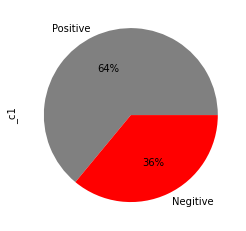

In [24]:
#airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

query_3_source = sentimentDataSet.toPandas()
print(query_3_source.columns)
query_3_source._c1.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["gray", "red"])

In [25]:
sentimentcategoryDataSet=sql_context.sql("SELECT * FROM tweets WHERE _c2 ='political' or _c2='tech' or _c2='business' ")

In [26]:
sentimentcategoryDataSet

DataFrame[_c0: string, _c1: string, _c2: string]

In [27]:
sentimentcategoryDataSet = sentimentcategoryDataSet.select(col("_c1").alias("Sentiment"),col("_c2"),col("_c0"))
sentimentcategoryDataSet=sentimentcategoryDataSet.withColumn("Sentiment", when(col("Sentiment") == 0, "Negitive").otherwise("Positive"))

In [28]:
sentimentcategoryDataSet.show()

+---------+---------+--------------------+
|Sentiment|      _c2|                 _c0|
+---------+---------+--------------------+
| Positive|     tech|dogo strong proje...|
| Positive| business|true btw have you...|
| Positive|political|i said single sex...|
| Positive|political|ain t a helluva l...|
| Negitive|political|police officer se...|
| Negitive|     tech|they won t return...|
| Negitive|political|   rt if you want it|
| Positive|     tech|if you see an art...|
| Positive|     tech|you better wear t...|
| Negitive|political|the media said th...|
| Negitive|     tech|nr styles i almos...|
| Positive|political|might put pressur...|
| Positive|     tech|bemil is a visual...|
| Positive|     tech|how many years ha...|
| Positive|     tech|the forsaken now ...|
| Positive|     tech|n rich it s prett...|
| Negitive|political|evanston township...|
| Positive|political|democrats going t...|
| Negitive|political|none of them requ...|
| Positive|     tech|              update|
+---------+

In [29]:
dataSet=sentimentcategoryDataSet.toPandas()

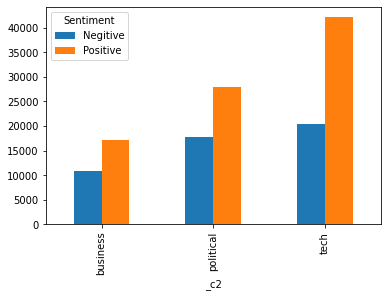

In [30]:

sentimentplot = dataSet.groupby(['_c2','Sentiment']).Sentiment.count().unstack()

sentimentplot.plot(kind='bar')

136214


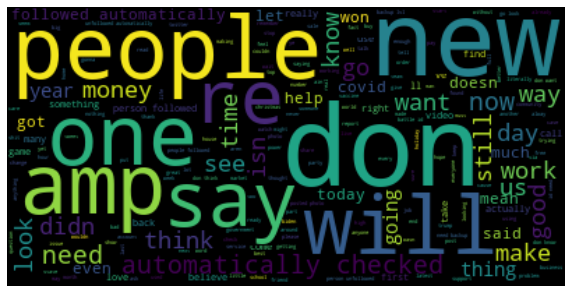

In [31]:
query_2_2_source=sentimentcategoryDataSet
print(query_2_2_source.count())
query_2_2_list = query_2_2_source.select('_c0').collect()
hashtags=" "   
for item in query_2_2_list:
    hashtags = hashtags + str(item._c0).strip()
from wordcloud import WordCloud    
wordcloud = WordCloud().generate(hashtags)

plt.figure( figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

62598


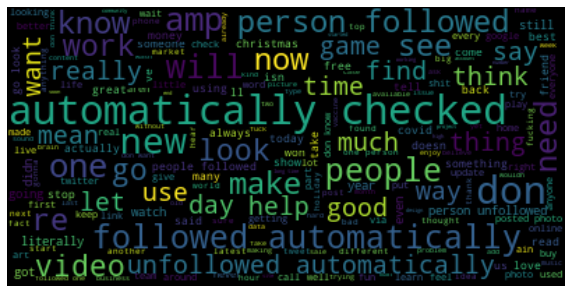

In [32]:
query_2_2_source=sentimentcategoryDataSet.filter(sentimentcategoryDataSet["_c2"] == 'tech')
print(query_2_2_source.count())
query_2_2_list = query_2_2_source.select('_c0').collect()
hashtags=" "   
for item in query_2_2_list:
    hashtags = hashtags +str(item._c0).strip()
from wordcloud import WordCloud    
wordcloud = WordCloud().generate(hashtags)

plt.figure( figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

45775


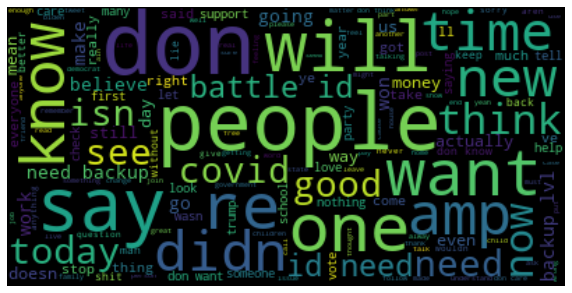

In [33]:
query_2_2_source=sentimentcategoryDataSet.filter(sentimentcategoryDataSet["_c2"] == 'political')
print(query_2_2_source.count())
query_2_2_list = query_2_2_source.select('_c0').collect()
hashtags=" "   
for item in query_2_2_list:
    hashtags = hashtags + str(item._c0).strip()
from wordcloud import WordCloud    
wordcloud = WordCloud().generate(hashtags)

plt.figure( figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

27841


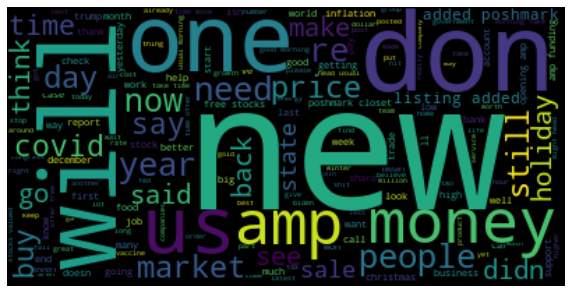

In [34]:
#bussiness
query_2_1_source=sentimentcategoryDataSet.filter(sentimentcategoryDataSet["_c2"] == 'business')
print(query_2_1_source.count())
query_2_1_list = query_2_1_source.select('_c0').collect()
hashtags=" "   
for item in query_2_1_list:
    hashtags = hashtags + str(item._c0).strip()
from wordcloud import WordCloud    
wordcloud = WordCloud().generate(hashtags)

plt.figure( figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
query_twitter_Tech = sql_context.sql("SELECT  *  FROM tweets WHERE _c0 Like '%twitter%' and _c1='elonmusk' ")

In [36]:
query_twitter_Tech.show(5,truncate=False)

+---+---+---+
|_c0|_c1|_c2|
+---+---+---+
+---+---+---+



In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import when
query_twitter_Tech = query_twitter_Tech.select(col("_c2").alias("Sentiment"),col("_c1"),col("_c0"))

In [ ]:
query_twitter_Tech=query_twitter_Tech.withColumn("Sentiment", when(col("Sentiment") == 0, "Negitive").otherwise("Positive"))

Index(['Sentiment', '_c1', '_c0'], dtype='object')


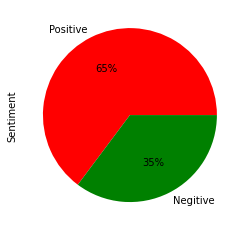

In [ ]:
twittertech=query_twitter_Tech.count()
query = query_twitter_Tech.toPandas()
print(query.columns)
query.Sentiment.value_counts().plot(kind='pie', autopct='%2.0f%%', colors=[ "red","green"])

In [ ]:
twittertech=query_twitter_Tech.count()

Index(['Sentiment', '_c1', '_c0'], dtype='object')


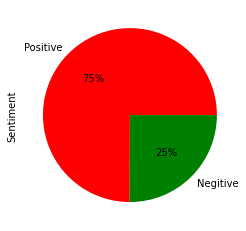

In [ ]:

query_amp_Tech = sql_context.sql("SELECT  *  FROM tweets WHERE _c0 Like '%cloud%' and _c1='tech' ")
query_amp_Tech = query_amp_Tech.select(col("_c2").alias("Sentiment"),col("_c1"),col("_c0"))
query_amp_Tech=query_amp_Tech.withColumn("Sentiment", when(col("Sentiment") == 0, "Negitive").otherwise("Positive"))
querytech=query_amp_Tech.count()
query = query_amp_Tech.toPandas()
print(query.columns)
query.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=[ "red","green"])

Index(['Sentiment', '_c1', '_c0'], dtype='object')


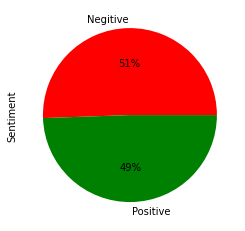

In [ ]:
query_one_Tech = sql_context.sql("SELECT  *  FROM tweets WHERE _c0 Like '%one%' and _c1='tech' ")
query_one_Tech = query_one_Tech.select(col("_c2").alias("Sentiment"),col("_c1"),col("_c0"))
query_one_Tech=query_one_Tech.withColumn("Sentiment", when(col("Sentiment") == 0, "Negitive").otherwise("Positive"))
onetech=query_one_Tech.count()
query = query_one_Tech.toPandas()
print(query.columns)
query.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=[ "red","green"])

Index(['Sentiment', '_c1', '_c0'], dtype='object')


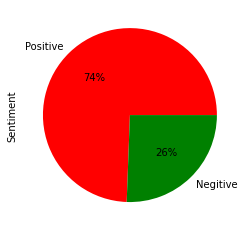

In [ ]:
query_one_Tech = sql_context.sql("SELECT  *  FROM tweets WHERE _c0 Like '%new%' and _c1='tech' ")
query_one_Tech = query_one_Tech.select(col("_c2").alias("Sentiment"),col("_c1"),col("_c0"))
query_one_Tech=query_one_Tech.withColumn("Sentiment", when(col("Sentiment") == 0, "Negitive").otherwise("Positive"))
newtech=query_one_Tech.count()
query = query_one_Tech.toPandas()
print(query.columns)
query.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=[ "red","green"])

Index(['Sentiment', '_c1', '_c0'], dtype='object')


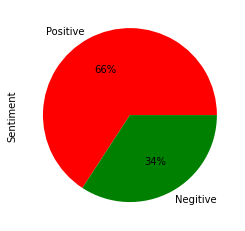

In [ ]:
query_one_Tech = sql_context.sql("SELECT  *  FROM tweets WHERE _c0 Like '%make%' and _c1='tech' ")
query_one_Tech = query_one_Tech.select(col("_c2").alias("Sentiment"),col("_c1"),col("_c0"))
query_one_Tech=query_one_Tech.withColumn("Sentiment", when(col("Sentiment") == 0, "Negitive").otherwise("Positive"))
maketech=query_one_Tech.count()
query = query_one_Tech.toPandas()

print(query.columns)
query.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=[ "red","green"])

In [ ]:
print(twittertech)
print(maketech)
print(newtech)
print(onetech)
print(querytech)

1876
1965
3048
8912
2193


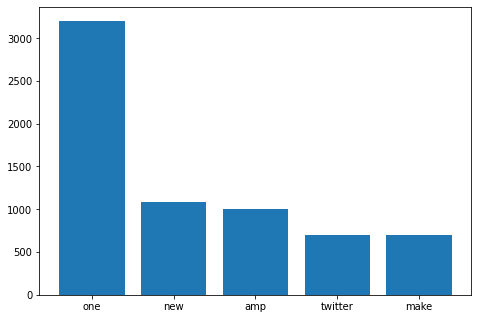

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ["one","new","amp","twitter","make"]
y = [3206,1086,1002,704,696];
ax.bar(x,y)
plt.show()